## FEEDBACK ANALYSIS

In [618]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

## YELP

In [619]:
yelp = pd.read_csv('C:/Users/ushai/Downloads/sentiment labelled sentences (1)/sentiment labelled sentences/yelp_labelled.txt', header=None,delimiter = "\t")
yelp.head(2)

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0


In [620]:
# Naming the columns
yelp.columns = ['Review', 'Feedback']
yelp.head(2)

,Review,Feedback
0,Wow... Loved this place.,1
1,Crust is not good.,0


In [621]:
# Changing values of the 'Feedback' column.
yelp.Feedback.replace([1,0], ['positive', 'negative'], inplace=True)
yelp.head(2)

,Review,Feedback
0,Wow... Loved this place.,positive
1,Crust is not good.,negative


### KEY WORDS - YELP

In [622]:
# Designating keywords
keywords = ['because','no',"didn't",'worst','damn','but','only','batter','hard','bye','never','go','again','least',"don't",'ever'\
,'bad','other',"wasn't",'down','extemely','little','slow','back','literally','absolutely','totally','back','off','bug'\
,'worth','enough','bad','sucks','zero','waste','nothing','felt','again','quality','will','disappointed','slow',"won't"\
,'why','never','before','probably','really',"can't",'return','rude','few','doubt','unless','wasting','mediocre','wait'\
,'minutes','ever','overall','find', 'hours','elsewhere','ordered', 'tasteless','definitely','running',"don't",'not','cold'\
,'leave','without','either','rarely','horrible','rather','recommend','terrible','guess','trying','hard','poor','management'\
,'waited','else','after','hate','ever!','waiting','cheap','impressed','sick','rare','cold','walked','should','really','please'\
,'old',"wouldn't",'barely','long','attitudes','dirt','sugary','unfortunately','charcoal','single','needed','finally',"won't"\
,'away','average','considering','overpriced','deserves','dirty', 'frozen','believe','insulted','judge','needless','however'\
,'bad','lost','fairly','clean','half','pulled','probably','lacked','busy','thought','asked','possible',"We've",'behind','suck'\
,'sucked','yet','under','beat','spend','awful','texture', 'lacking','overall','time']

for key in keywords:
    yelp[str(key)] = yelp.Review.str.contains(' ' + str(key) + ' ', case=False)

# Also including AllCaps
yelp['allcaps'] = yelp.Review.str.isupper()
yelp.head(2)

,Review,Feedback,because,no,didn't,worst,damn,but,only,batter,...,sucked,yet,under,beat,spend,awful,texture,lacking,time,allcaps
0,Wow... Loved this place.,positive,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,negative,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [623]:
# Converting the 'Feedback' column to boolean (From positive and negative to True or False)
yelp['Feedback'] = (yelp['Feedback'] == 'negative')
yelp.head(2)

,Review,Feedback,because,no,didn't,worst,damn,but,only,batter,...,sucked,yet,under,beat,spend,awful,texture,lacking,time,allcaps
0,Wow... Loved this place.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### HEAT MAP - YELP

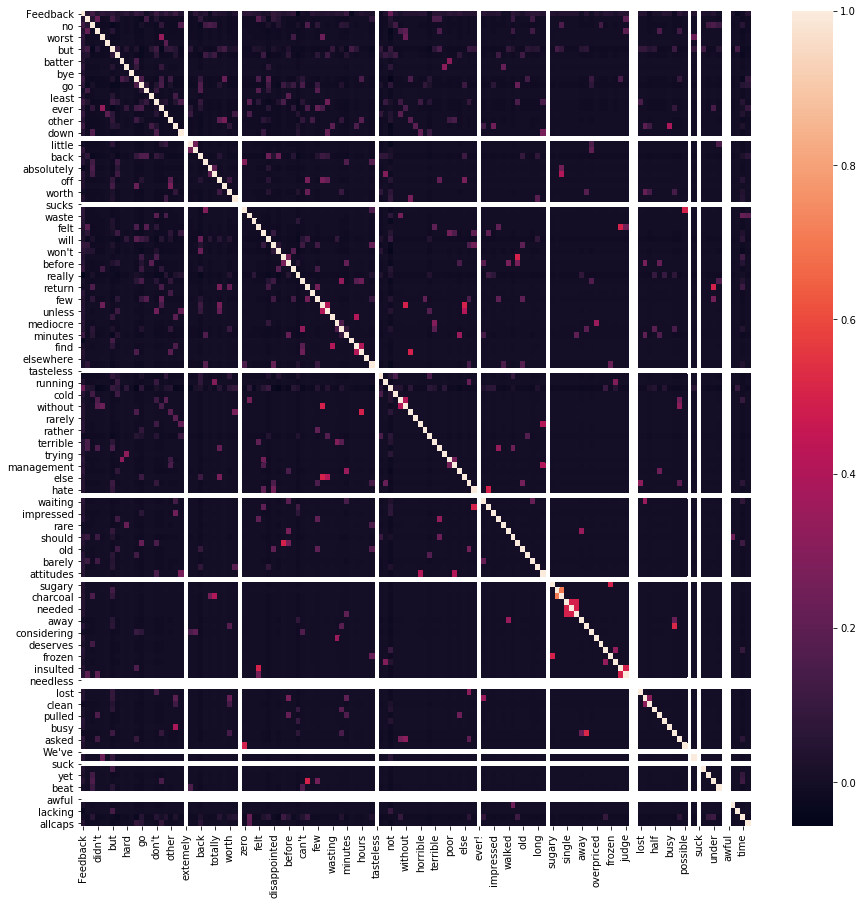

In [624]:
plt.figure(figsize=(15,15))
sns.heatmap(yelp.corr())

### SETTING UP DATA - YELP

In [625]:
# Setting up training data
data_yelp = yelp[keywords + ['allcaps']]
data_yelp.head(2)

,because,no,didn't,worst,damn,but,only,batter,hard,bye,...,yet,under,beat,spend,awful,texture,lacking,overall,time,allcaps
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [626]:
# Setting up a target
target_yelp = yelp['Feedback']
target_yelp.head()

0    False
1     True
2     True
3    False
4    False
Name: Feedback, dtype: bool

In [627]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

In [628]:
# Instantiating our model and store it in a new variable.
model = BernoulliNB()

In [629]:
# Fit our model to the data.
model.fit(data_yelp, target_yelp)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

## AMAZON

In [630]:
amazon = pd.read_csv('C:/Users/ushai/Downloads/sentiment labelled sentences (1)/sentiment labelled sentences/amazon_cells_labelled.txt', header=None,delimiter = "\t")
amazon.head(2)

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1


In [631]:
# Naming the columns
amazon.columns = ['Review', 'Feedback']
amazon.head(2)

,Review,Feedback
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1


In [632]:
# Changing values of the 'Feedback' column.
amazon.Feedback.replace([1,0], ['positive', 'negative'], inplace=True)
amazon.head(2)

,Review,Feedback
0,So there is no way for me to plug it in here i...,negative
1,"Good case, Excellent value.",positive


### KEY WORDS - AMAZON

In [633]:
# Designating keywords

keywords = ['not','disappointing', 'rude', 'madhouse', 'waiting', 'cold', 'poorly', 'poor', 'mediocre', 'fail'\
           ,'never', 'slow', 'disappointed', 'back', 'again', "don't", "won't", 'unfortunately','overpriced'\
           ,"wasn't", 'horrible', 'ever', 'sad', 'unprofessional', 'terrible', 'awful','waste','wasted','bad','angry'\
           ,'shocked', 'worst', 'no', 'insulted','disrespected','needless', 'problem','waste','not',"didn't",'unacceptible'\
           ,'unusable','short','worthless','garbage','poor','disappointed','bad',"don't",'down','poor','different','bad','drawback'\
           ,'clearly','on','off','different','flaw','but','time','forget','enough',"doesn't",'hate','lock','loud','off','problems'\
           ,"didn't",'returned','embarrassing', 'useless','unusable','wasted','unhappy','never','quality','mistake','return'\
           ,'difficult','rather','junk','impressed','reason','whatsoever','low','experience','none','poorly','terrible','cannot'\
           ,'less','performance','broke','slow','care','complaint','replacement','but','cheap','horrible','despite','particular'\
           ,'smell',"can't", "wasn't",'forced','garbled','great','dying','lost','either','expect','unreliable','neither','chinese'\
           ,'stupid','failed',"couldn't",'drain','wrong','however','refun','breaks','lose']

for key in keywords:
    amazon[str(key)] = amazon.Review.str.contains(' ' + str(key) + ' ', case=False)

# Also including AllCaps
amazon['allcaps'] = amazon.Review.str.isupper()
amazon.head(2)

,Review,Feedback,not,disappointing,rude,madhouse,waiting,cold,poorly,poor,...,stupid,failed,couldn't,drain,wrong,however,refun,breaks,lose,allcaps
0,So there is no way for me to plug it in here i...,negative,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",positive,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [634]:
# Converting the 'Feedback' column to boolean (From positive and negative to True or False)
amazon['Feedback'] = (amazon['Feedback'] == 'negative')

### HEAT MAP - AMAZON

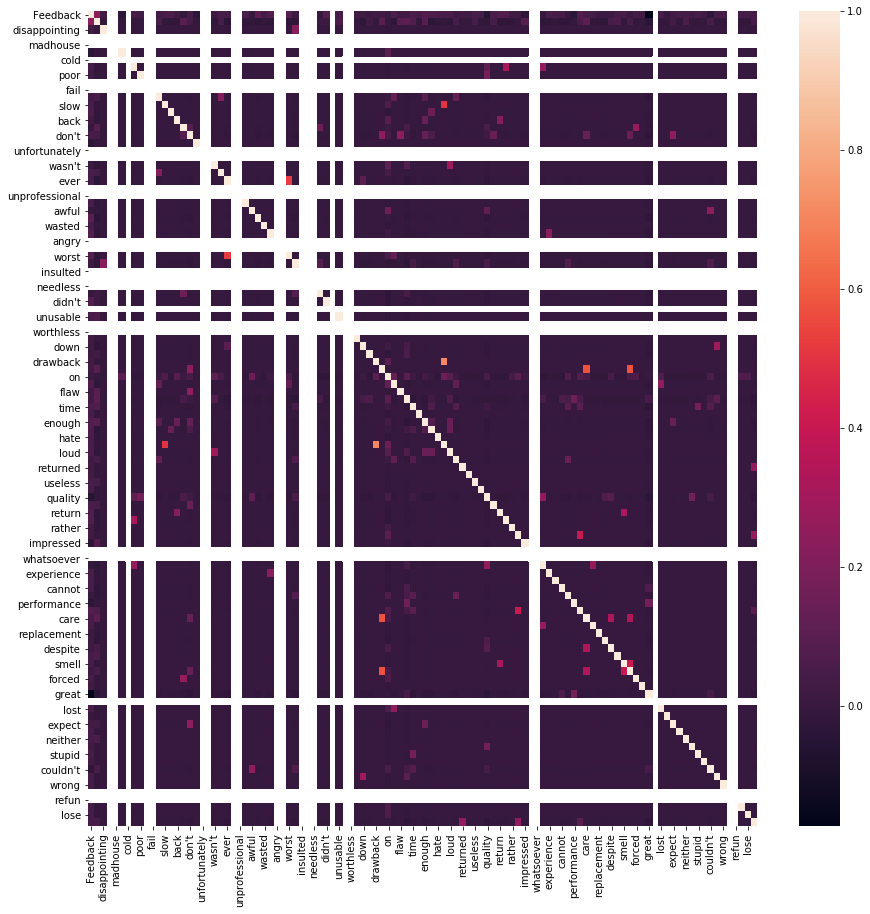

In [635]:
plt.figure(figsize=(15,15))

sns.heatmap(amazon.corr())

### SETTING UP DATA - AMAZON

In [636]:
# Setting up data for amazon
data_amazon = amazon[keywords + ['allcaps']]
data.head(2)

,not,disappointing,rude,madhouse,waiting,cold,poorly,poor,mediocre,fail,...,stupid,failed,couldn't,drain,wrong,however,refun,breaks,lose,allcaps
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [637]:
# Classify, storing the result in a new variable.
y_pred = model.predict(data_amazon)

ValueError: Expected input with 150 features, got 127 instead

In [638]:
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0],(target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 425
